In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("Advertising.csv")

In [4]:
# ISLR chapter 3.1
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
# simple linear regression cuma bisa 1 feature, tapi csv nya ada 3 (TV, radio, newspaper)
# jadi kita combine ke 1 column total spend

In [6]:
# ini namanya engineered feature
# artinya feature ini aslinya ga ada, tapi terbuat dari combining feature2 yg ada
df['total_spend'] = df['TV'] + df['radio'] + df['newspaper']

In [7]:
df.head()

,TV,radio,newspaper,sales,total_spend
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0


<AxesSubplot:xlabel='total_spend', ylabel='sales'>

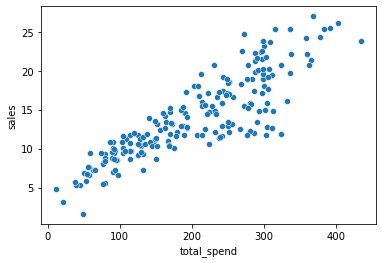

In [8]:
sns.scatterplot(data=df,x='total_spend',y='sales')
# bisa kita liat makin gede spendnya emang makin gede salesnya
# jadi ada hubungan linear

<AxesSubplot:xlabel='total_spend', ylabel='sales'>

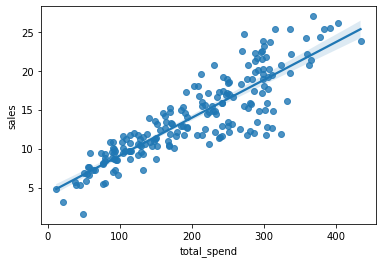

In [9]:
# ada plot baru yg bisa munculin regression line pake ordinarily squares (regplot)
sns.regplot(data=df,x='total_spend',y='sales')
# jadi muncul best fit line nya

Let's go ahead and start solving: $$y=mx+b$$

Simply solve for m and b, remember, that as shown in the video, we are solving in a generalized form:

$$ \hat{y} = \beta_0 + \beta_1X$$

Capitalized to signal that we are dealing with a matrix of values, we have a known matrix of labels (sales numbers) Y and a known matrix of total_spend (X). We are going to solve for the *beta* coefficients, which as we expand to more than just a single feature, will be important to build an understanding of what features have the most predictive power. We use y hat to indicate that y hat is a prediction or estimation, y would be a true label/known value.

We can use NumPy for this (if you really wanted to, you could solve this by [hand](https://towardsdatascience.com/linear-regression-by-hand-ee7fe5a751bf))

In [10]:
# skrg kita pisahin dulu X sama y
X = df['total_spend']
y = df['sales']

In [12]:
# ordinary least squares (OLS)
# ada function numpy buat itung least squares
help(np.polyfit)

# di tulisnya Least Polynomial fit
# artinya bisa x, x square, x cube, dan pangkat seterusnya
# deg=1 artinya pangkat 1, deg=2 pangkat 2, deg=3 pangkat 3.
# tapi untuk case ini kita cuma perlu pangkat 1
# soalnya kita perlu cari ini y = mx+b buat best fit
# kalo kita masukin coefficient jadi gini
# y = B1x + B0

# polyfit bakal return 2 angka yaitu coefficientnya

Help on function polyfit in module numpy:

polyfit(x, y, deg, rcond=None, full=False, w=None, cov=False)
    Least squares polynomial fit.
    
    .. note::
       This forms part of the old polynomial API. Since version 1.4, the
       new polynomial API defined in `numpy.polynomial` is preferred.
       A summary of the differences can be found in the
       :doc:`transition guide </reference/routines.polynomials>`.
    
    Fit a polynomial ``p(x) = p[0] * x**deg + ... + p[deg]`` of degree `deg`
    to points `(x, y)`. Returns a vector of coefficients `p` that minimises
    the squared error in the order `deg`, `deg-1`, ... `0`.
    
    The `Polynomial.fit <numpy.polynomial.polynomial.Polynomial.fit>` class
    method is recommended for new code as it is more stable numerically. See
    the documentation of the method for more information.
    
    Parameters
    ----------
    x : array_like, shape (M,)
        x-coordinates of the M sample points ``(x[i], y[i])``.
    y : array_

In [14]:
np.polyfit(X,y,deg=1)
# y = B1x + B0
# yang kiri B1, kanan B0

array([0.04868788, 4.24302822])

jadi kita udah bisa ngitung kalo misal ada pertanyaan spend 300 bisa sales berapa, kita tinggal masukin 300 sebagai X terus kita cari y nya.

In [19]:
# skrg kita coba buat array angka yang kira2 bakalan cocok jadi spendnya, 0-500 soalnya di datasetnya rangenya kurleb segitu 
potential_spend = np.linspace(0,500,100)

In [16]:
# skrg array sales habis spendnya di masukin ke formulanya
predicted_sales = 0.04868788*potential_spend + 4.24302822

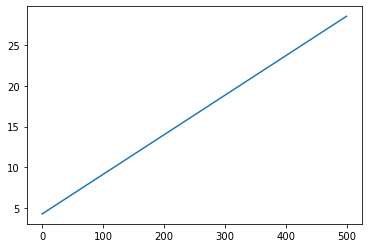

In [17]:
plt.plot(potential_spend,predicted_sales)
# plotnya sama persis manual vs dari regplot

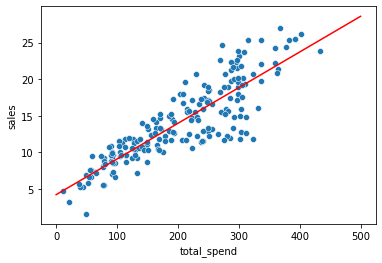

In [18]:
sns.scatterplot(data=df,x='total_spend',y='sales')
plt.plot(potential_spend,predicted_sales,color='red')

In [24]:
# kita jawab pertanyaan di atas yang 300 spend
spend = 300
predicted_sales = 0.04868788*spend + 4.24302822

In [25]:
predicted_sales

18.849392220000002

# Further considerations...which we will explore in much more depth!

## Overfitting, Underfitting, and Measuring Performance

Notice we fit to order=1 , essentially a straight line, we can begin to explore higher orders, but does higher order mean an overall better fit? Is it possible to fit too much? Too little? How would we know and how do we even define a good fit?

In [26]:
np.polyfit(X,y,3)

array([ 3.07615033e-07, -1.89392449e-04,  8.20886302e-02,  2.70495053e+00])

In [27]:
# y = B3x**3 + B2x**2 + B1x + B0

In [30]:
pot_spend = np.linspace(0,500,100)

In [37]:
pred_sales = 3.07615033e-07*pot_spend**3 + -1.89392449e-04*pot_spend**2 + 8.20886302e-02*pot_spend**1 + 2.70495053e+00

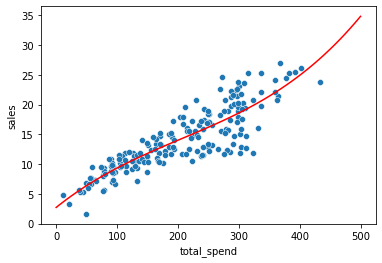

In [38]:
sns.scatterplot(x='total_spend',y='sales',data=df)
plt.plot(pot_spend,pred_sales,color='red')

jadi sekarang kita punya 2 model, polynomial sama linear fit, tapi kita gatau mana yg lebih bagus performance nya kan? semua akan dibahas di lecture selanjutnya. skrg jadi kita ada gambaran

## Multiple Features

The real data had 3 features, not everything in total spend, this would allow us to repeat the process and maybe get a more accurate result?

kita cuma pake 1 features aja total spend, padahal harusnya di pisah lebih bagus soalnya bisa aja TV punya impact paling gede dibanding yang lain

In [39]:
X = df[['TV','radio','newspaper']]
y = df['sales']

In [40]:
# cuma ga bisa pake cara ini jadinya, soalnya polyfit cuma bisa 1D vector
np.polyfit(X,y,1)

TypeError: expected 1D vector for x